First and foremost before commencing our analysis, we need to import the required libraries 

1. Since this assignment would likely require a lot of mathematical and statistical calculations and also data analysis, " Numpy"  and " Pandas"  are definitely required. 

2. We would also need to make a lot of visualizations of the data for easier understanding, so we would also need data visualization libraries like Seaborn and Matplotlib

3. Sklearn and Statsmodels would also be probably necessary as we would be required to carry out regression and model fitting



In [629]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We would also be importing from sklearn and statsmodels whenever required in the next cell

In [630]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [631]:
# Hide warnings

import warnings
warnings.filterwarnings('ignore')

# 1  Read & Understand the Data

In [632]:
# Let us import the csv file containing our data
byke_data = pd.read_csv('day.csv')


In [633]:
byke_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [634]:
#Let us check the Number of rows and collumns
byke_data.shape

(730, 16)

The data has 730 rows and 16 collumns. We now need to check how many of these do we actually need. We need to make the data well suitable for analysis as raw data is likely to be cranky. 
Firstly, we need to check for Null values and get rid of them as these are useless for the analysis. 


In [635]:
byke_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [636]:
byke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Next, let us have a look at a few summary statistics to understand the data so that we get an overview of the same

In [637]:
byke_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We now need to check if there are any duplicate values and drop them as duplication will distort our analysis. 

In [638]:
byke_data.drop_duplicates(inplace=True)

In [639]:
#Rechecking the shape
byke_data.shape

(730, 16)

Since shape remains the same, we can conclude that we do not have any duplicate values

Let us now have a look at the data again and remove unnecessary collumns which have no incremental value addition for analysis. These are

1. casual- This collumn indicates the count of casual users
2. registered- This collumn indicates the count of registered users

Above 2 collumns give the breakup of count of total rental bikes which is already indicated in cnt collumn. Since in this analysis, we have only cnt as the target variable and we are really not interested in predicting the breakup of the same into casual and registered user, these 2 collumns are meaningless for our analysis and they can be dropped to make the data simpler. 






In [640]:
byke_data.drop(['casual','registered'],axis=1,inplace=True)

In [641]:
byke_data.shape

(730, 14)

We will now encode and map the collumns in accordance to the data dictionary for better clarity to the users and for our own better understanding. We will do this for the month, weekday, season and weathersit collumns as per the data dictionary  

In [642]:
byke_data.mnth = byke_data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

byke_data.weekday = byke_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

byke_data.season = byke_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

byke_data.weathersit = byke_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_rainsnow',4:'Heavy_rainsnow'})



In [643]:
#Let's have a look at the data again for our satisfaction
byke_data.head()


# We have purposely not mapped year

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


We can also see that 2 more collumns do not add any incremental value to our analysis. 

1. instant is only an index
2. dteday which shows the date is already explained by other collumns i.e. yr and mnth which are relevant for our analysis. 

So , additionally, we can also drop these collumns too.

In [644]:
byke_data.drop(['instant','dteday',],axis=1,inplace=True)

In [645]:
byke_data.shape

(730, 12)

# 2  Visualize the data

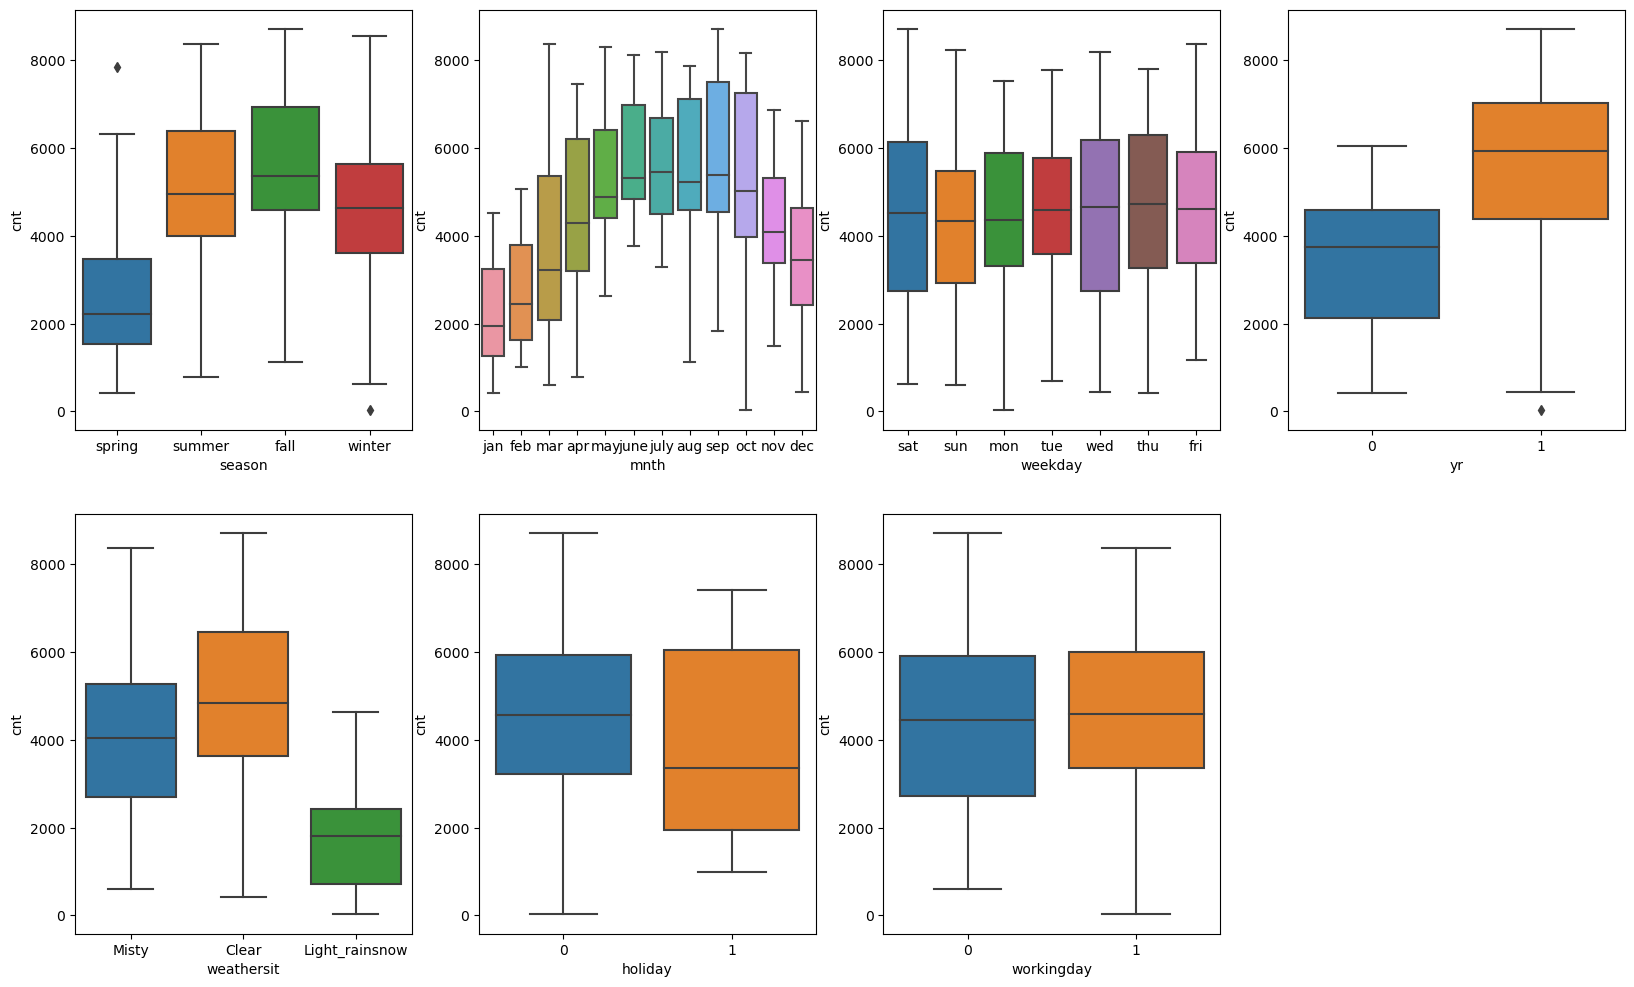

In [646]:
# Let’s now visualize some boxplots
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = byke_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = byke_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = byke_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'yr', y = 'cnt', data = byke_data)
plt.subplot(2,4,5)

sns.boxplot(x = 'weathersit', y = 'cnt', data = byke_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = byke_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = byke_data)
plt.show()


Let's also plot some more visualizations of categorical variables


In [647]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=byke_data)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=byke_data, hue='yr',palette='Set2')
    plt.legend(labels=['2018', '2019'])
    plt.show()

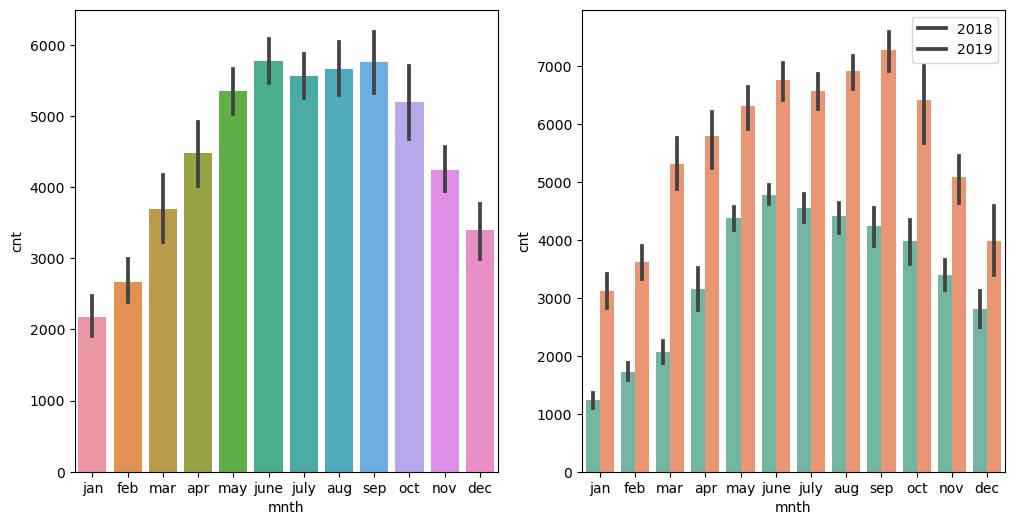

In [648]:
# visualizing data monthly
plot_cat_columns('mnth')

We can infer the following from the above plot.

1. Number of users seems to have increased from 2018 to 2019 across all months.
2. Number of users has gone up during the months of may, june, july, aug, sep and oct. 


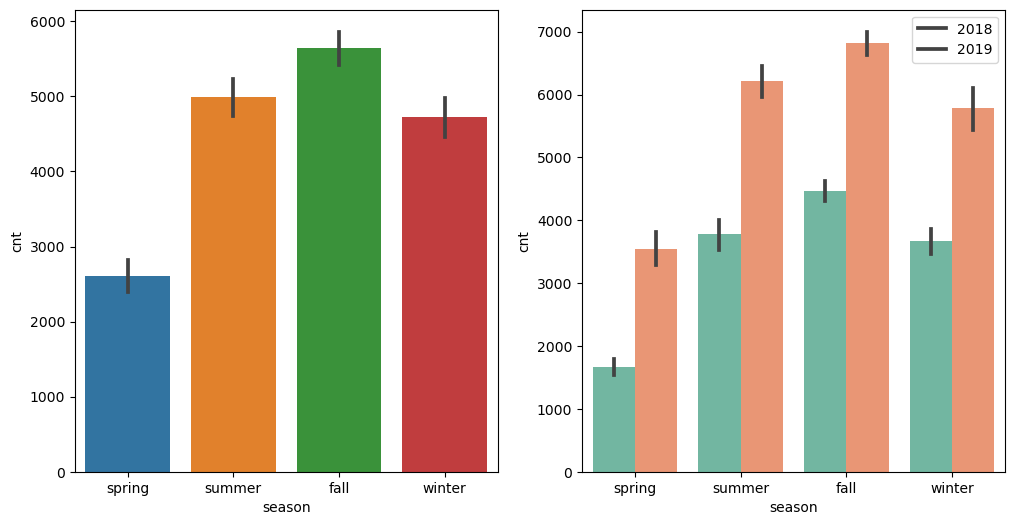

In [649]:
#Visualizing seasons
plot_cat_columns('season')

We can make the following observations from the above plot:
1. Irrespective of the season, number of users have increased significantly in 2019 as compared to 2018. 

2. Both years have seen higher bookings during the fall season and lower bookings during spring. Bookings in summer are higher compared to winter in both the years. Thus, we can see that the season plays an important role in determining the number of users. This also seems to corroborate with the monthly trend as per the seasons in the US.
 

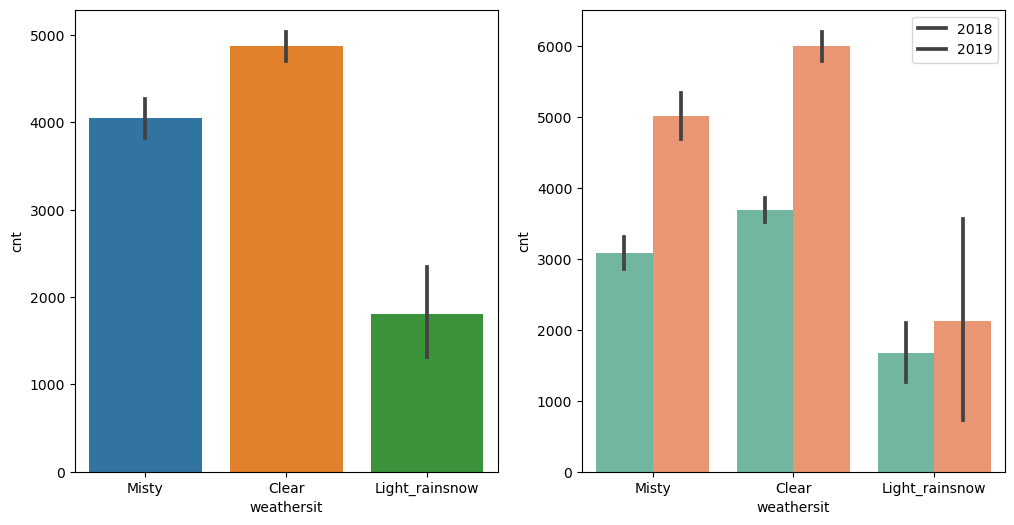

In [650]:
# Visualizing weathersit column also similarly
plot_cat_columns('weathersit')

We can make the following observations from the above plot:

Irrespective of the weather, number of users have increased significantly in 2019 as compared to 2018.

Number of bike users has been higher during clear weather during both the years and lower when it has been raining or snowing.

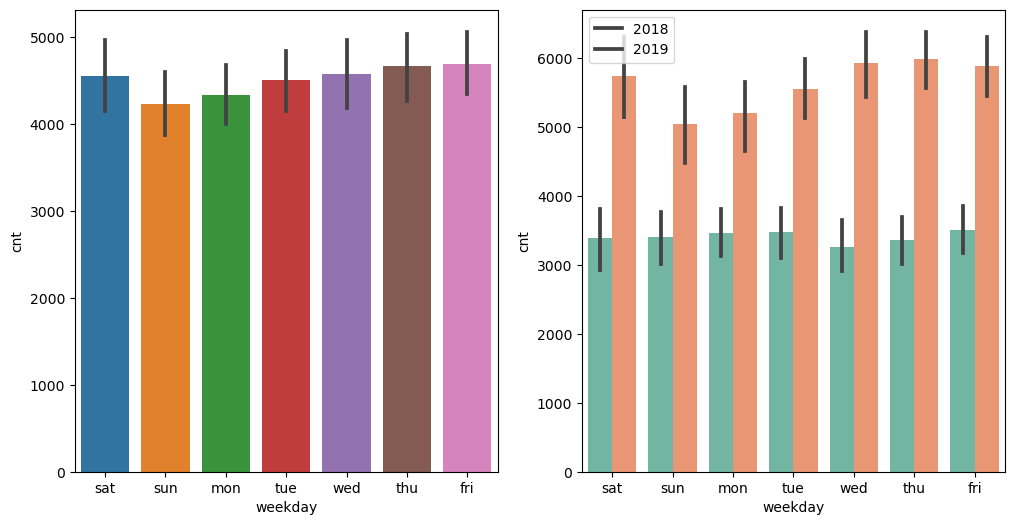

In [651]:
# Making a weedday wise analysis

plot_cat_columns('weekday')


From the above plot, we can see clearly that demand is more during thursdays, fridays & saturdays.  Also demand has increased in 2019 as compared to 2018 for all days.

# let's visualize the year column too

plot_cat_columns('yr')

The above plot confirms our inferences that demand has gone up tremendously in 2019.

For the Numerical variables we can create a heatmap to analyze the correlations

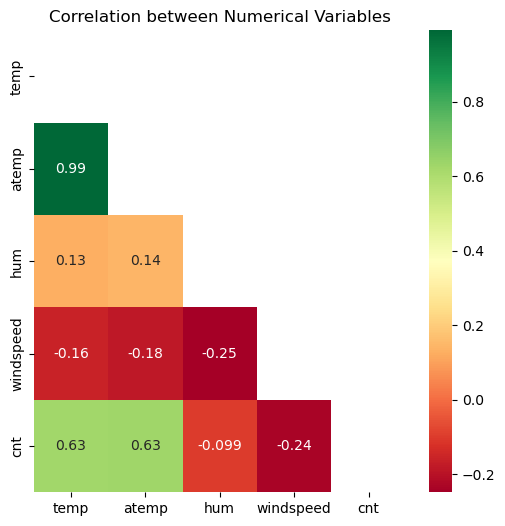

In [652]:
plt.figure(figsize = (6,6))
matrix = np.triu(byke_data[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(byke_data[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

From the above plot, we can conclude that there is already a high correlation between temp and atemp. We cannot keep both the  parameters in the model due to multicolinearity. We will have to choose which parameters to keep and which to discard based on VIF and p-value comparison. Let us also have a look at some other plots

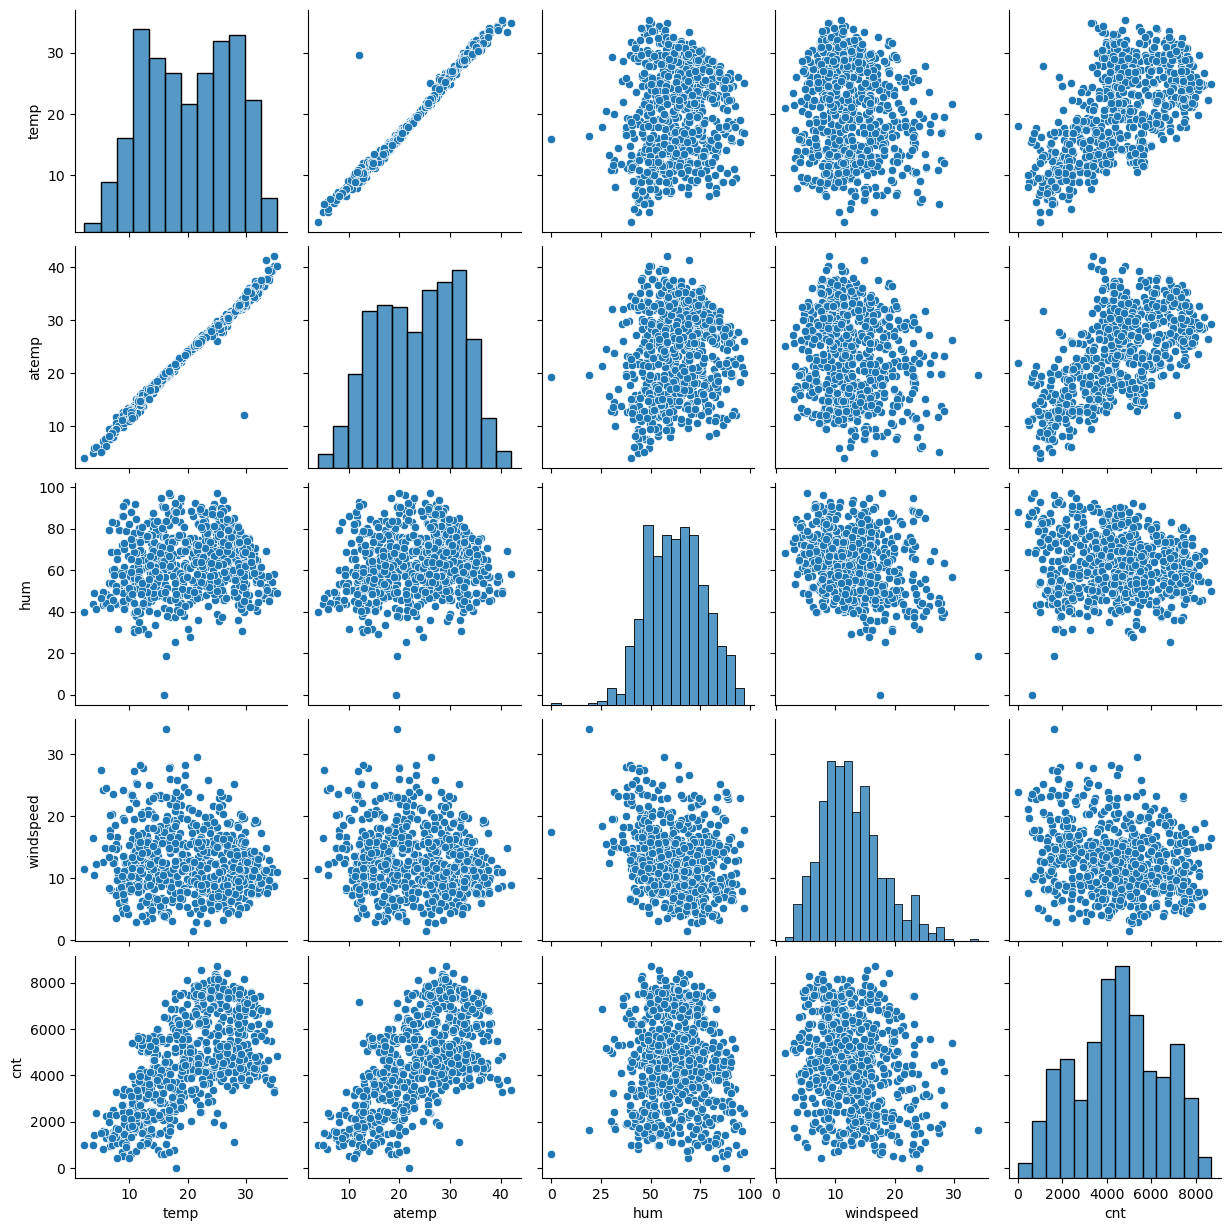

In [653]:
# pairplot for numerical columns
sns.pairplot(data=byke_data,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

We can once again see high correlation between temp and atemp

# 3 Data preparation

First and foremost, we need to create dummy variables. The variable season,mnth,weekday and weathersit have different levels. We need to convert these levels into integers. 

In [654]:
mnths_dummy=pd.get_dummies(byke_data.mnth,drop_first=True)

weekdays_dummy=pd.get_dummies(byke_data.weekday,drop_first=True)

weathersit_dummy=pd.get_dummies(byke_data.weathersit,drop_first=True)

seasons_dummy=pd.get_dummies(byke_data.season,drop_first=True)


In [655]:
byke_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [656]:
byke_newdata = pd.concat([byke_data,mnths_dummy,weekdays_dummy,weathersit_dummy,seasons_dummy],axis=1)

In [657]:
byke_newdata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_rainsnow,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [658]:
byke_newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

Since we have created dummy variables for 'season','mnth','weekday', & 'weathersit', we can drop these columns now.

In [659]:
byke_newdata.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [660]:
byke_newdata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_rainsnow,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [661]:
byke_newdata.shape

(730, 30)

# 4 Train- test split of data

In [662]:
# splitting the dataframe into Train and Test

np.random.seed(0)
byke_newdata_train, byke_newdata_test = train_test_split(byke_newdata, train_size = 0.7, random_state = 100)

Let us now check the shape of the training and test dataset

In [663]:
byke_newdata_train.shape

(510, 30)

In [664]:
byke_newdata_test.shape

(220, 30)

Since, we have a lot of dummy and categorical variables, we will use the min max scaler. This is to ensure better  interpretability. 

In [665]:
scaler = MinMaxScaler()

Let us apply scaler() to all the numerical variables

In [666]:
var_no=['temp','atemp','hum','windspeed','cnt']
byke_newdata_train[var_no] = scaler.fit_transform(byke_newdata_train[var_no])

Let us see some summary statistics for training dataset

In [667]:
byke_newdata_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_rainsnow,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We will also need to check once again for Multi Collinearity in the training dataset

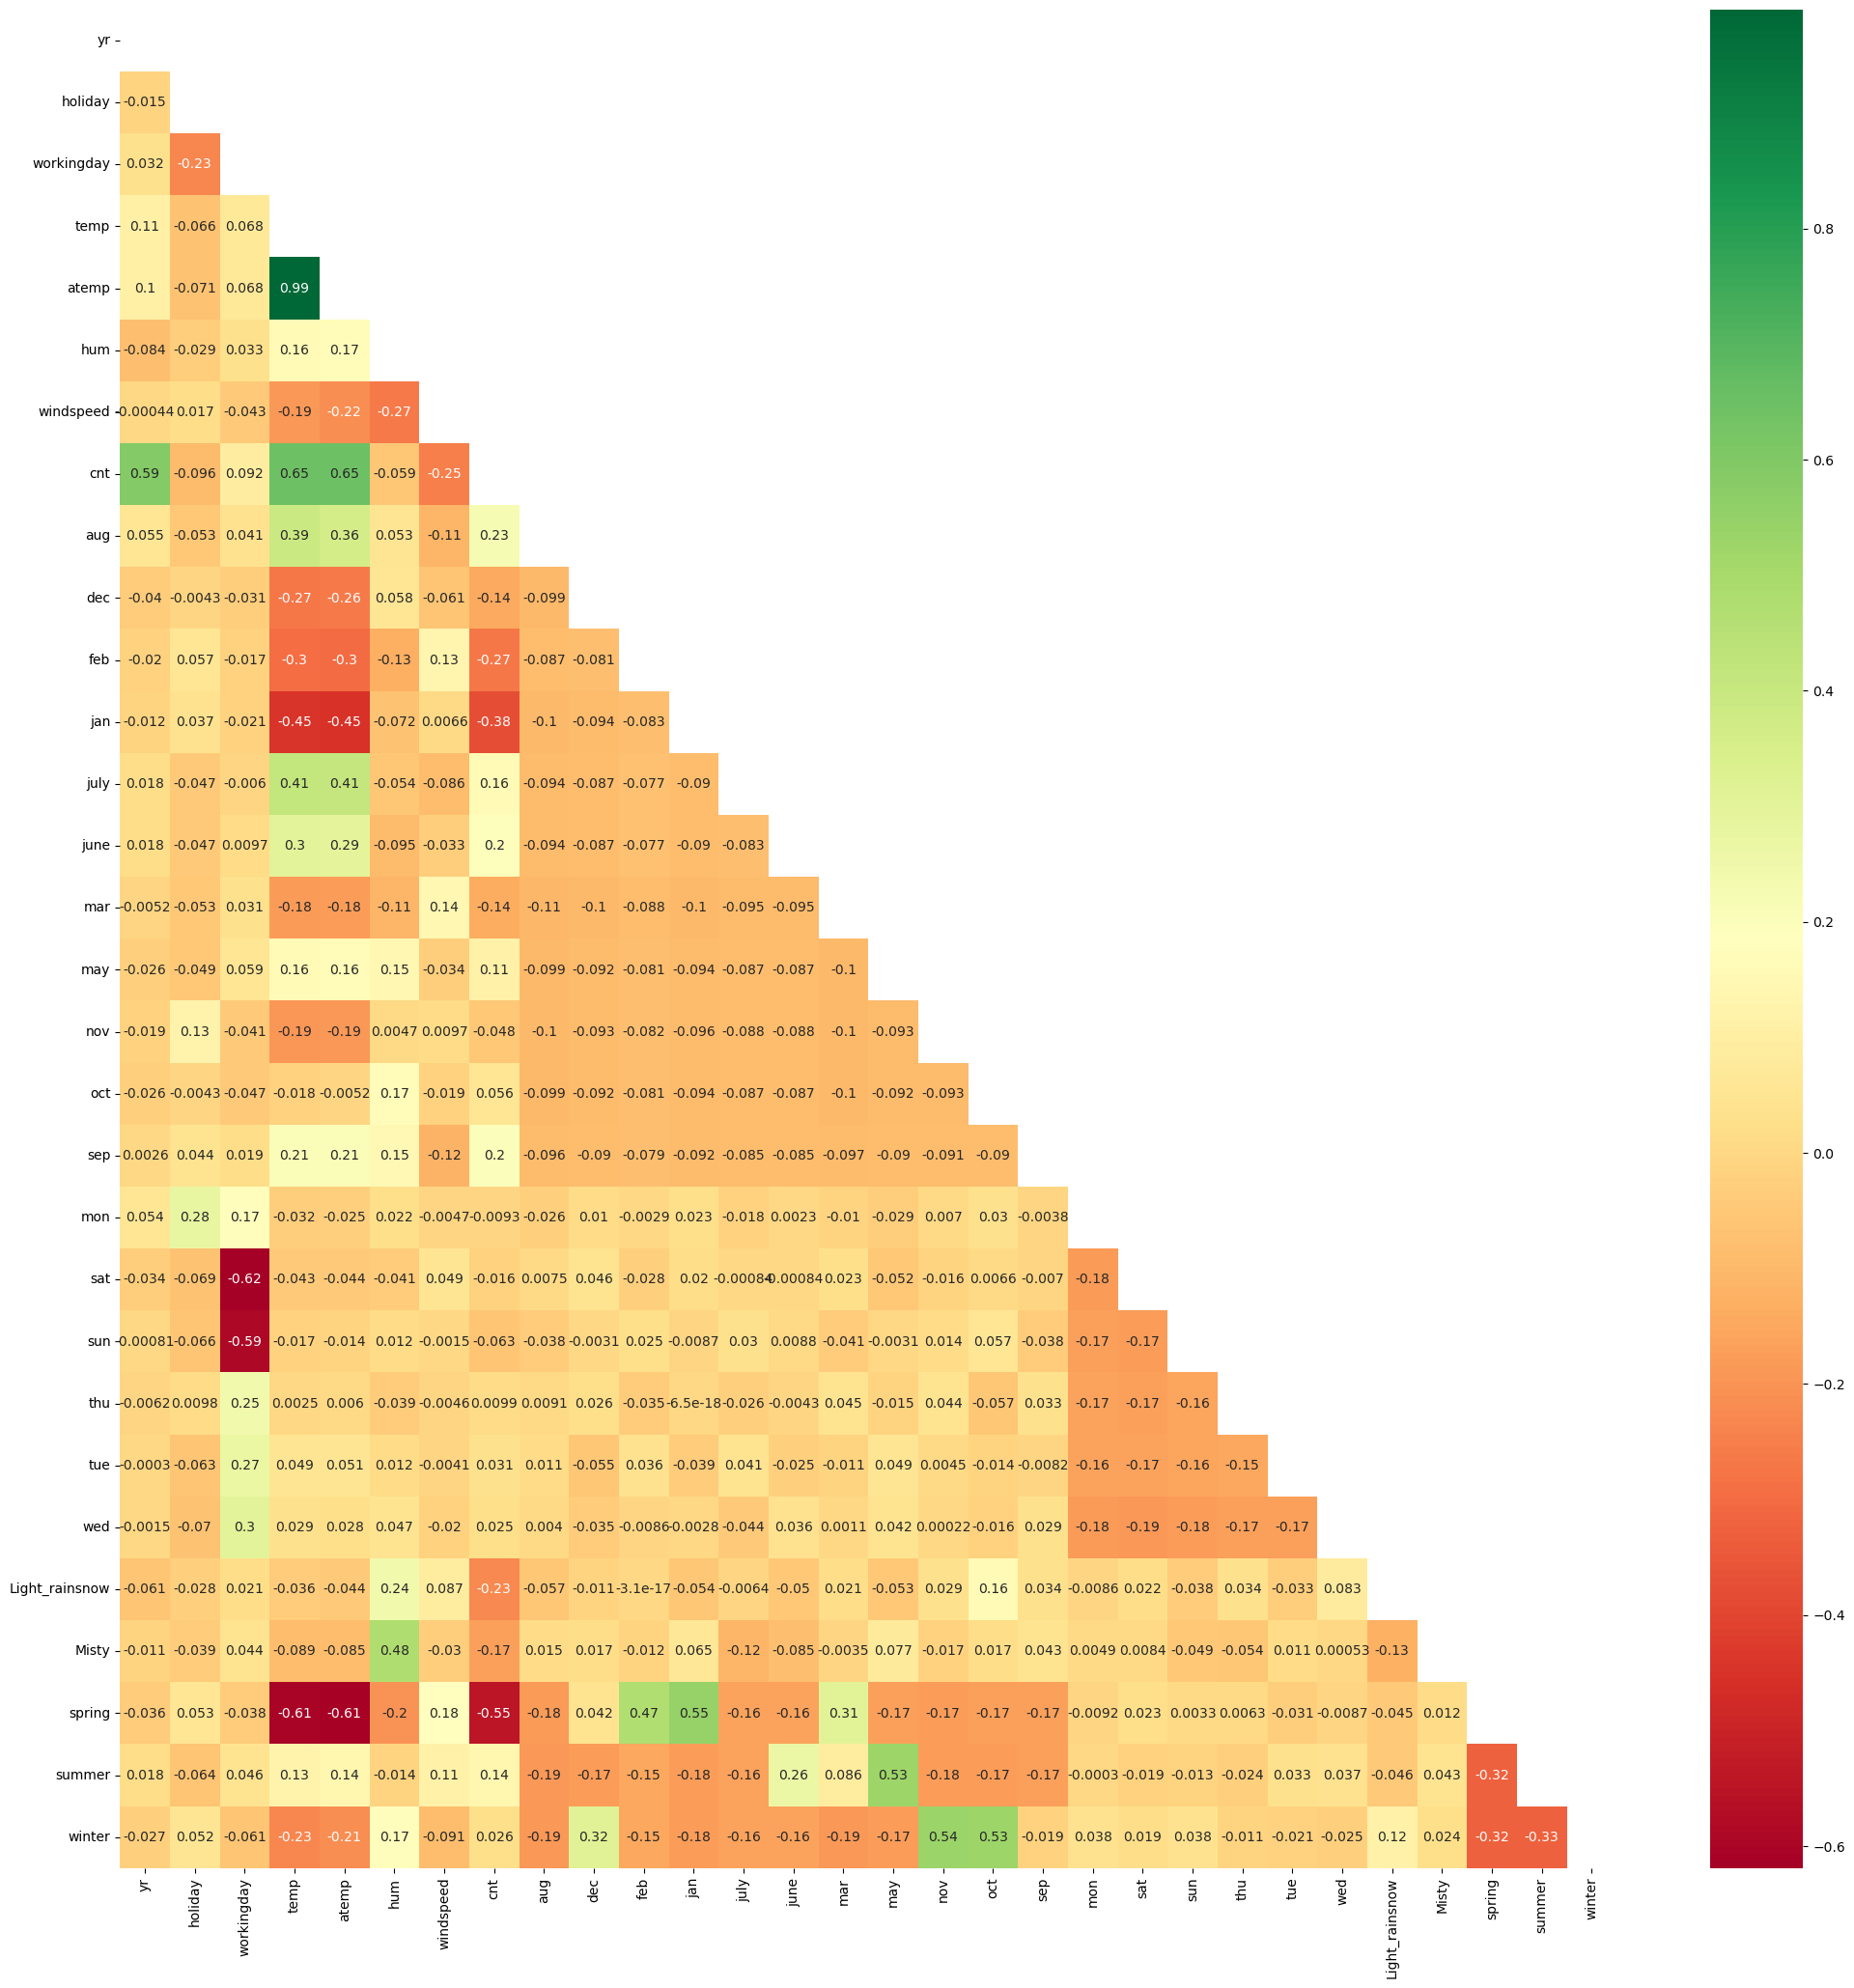

In [668]:
plt.figure(figsize = (25,25))
matrix = np.triu(byke_newdata_train.corr())
sns.heatmap(byke_newdata_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

Following observations can be made:

1. cnt has correlation with yr variable atemp and temp. 
2. Mist and humidity show correlation. 
3. Spring season has correlation with Jan and Feb month, Summer season with may month and Winter season with oct and nov month. This makes a lot of sense as they are mostly the respective seasons.


Now, let us build the linear model

In [669]:
y_train = byke_newdata_train.pop('cnt')
X_train = byke_newdata_train

In [670]:
byke_newdata.shape

(730, 30)

Since, we have close to 29 features, it is definitely not wise to manually eliminate the features. So we would prefer using recursive feature elimination to select the features. Let us start with an arbitary number of features. Say- 10 features. Then we will use statsmodels library to build models using the shortlisted features and double check the same using VIF and p values.

In [671]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [672]:
rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [673]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 13),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [674]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_rainsnow', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [675]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [676]:
X_train_rfe=X_train[col]

# 5 Building a linear model

In [677]:
# Building the 1st linear regression model based on RFE

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.89e-189
Time:                        17:52:18   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2422      0.025      9.

We can observe from the above that Holiday and atemp still have a higher p value (greater than 0.05) and so they are not that significant. We can decide whether to drop them after having a look at VIFs too.

In [678]:
# Generic function to calculate VIF of variables


def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [679]:
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,sat,9.96
10,sun,9.67
13,spring,2.55
1,holiday,2.54
5,hum,1.90
14,winter,1.79
12,Misty,1.57


atemp can definitely be dropped as it has a high VIF and high p value as well

In [680]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

In [681]:
# Building the 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.38e-190
Time:                        17:53:56   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2435      0.025      9.

Since Adj R sq remains the same , our second model is definitely better than the first model after dropping atemp. But, we still have ' holiday'  with a higher p value.  Let us check VIF again and see if we can drop it

In [682]:
calculateVIF(X_train_new)

,Features,VIF
2,workingday,40.65
8,sat,9.92
9,sun,9.64
3,temp,2.99
12,spring,2.55
1,holiday,2.54
4,hum,1.89
13,winter,1.78
11,Misty,1.57
6,july,1.30


Even if holiday has a low VIF, we will still try dropping it as its p value is high. 

In [683]:
X_train_13 = X_train_new.drop(['holiday'], axis = 1)

In [684]:
# Building the 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_13)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          9.38e-190
Time:                        17:55:20   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2355      0.040      5.

Since Adj R sq remains the same, our THIRD model is definitely better than the 2nd model after dropping holiday. Let us recheck VIF. No p value is greater than 0.05, so we just need to check VIF

In [685]:
calculateVIF(X_train_13)

,Features,VIF
3,hum,29.19
2,temp,17.25
1,workingday,16.91
7,sat,4.57
4,windspeed,4.52
8,sun,4.45
11,spring,2.79
10,Misty,2.28
12,winter,2.14
0,yr,2.08


Next, let us try dropping hum which has a higher VIF

In [686]:
X_train_12 = X_train_13.drop(['hum'], axis = 1)

In [687]:
# Building the 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_12)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.26e-187
Time:                        17:57:04   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1553      0.035      4.

Adj R sq has dropped but then Adj r sq is still reasonably high, so we can consider the model good provided VIF of all variables remains below 5. Let's check

In [690]:
calculateVIF(X_train_12)

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
6,sat,3.77
7,sun,3.54
10,spring,2.44
0,yr,2.07
11,winter,1.78
9,Misty,1.58
4,july,1.37


In [692]:
# Let us drop workingday having high VIF even if p value is low
X_train_11 = X_train_12.drop(['workingday'], axis = 1)

In [693]:
# Building the 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_11)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.84e-185
Time:                        18:00:36   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2558      0.024     10.

In [694]:
calculateVIF(X_train_11)

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
3,july,1.35
5,sat,1.22
6,sun,1.21
4,sep,1.20


Sat has got a high p value now, though VIFs of all variables are below 5. So we have to drop sat and recheck VIF and p values. Lets do it

In [699]:
X_train_6 = X_train_11.drop(['sat'], axis = 1)

In [700]:
# Building the 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_6)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.75e-186
Time:                        18:04:48   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2586      0.024     10.

In [701]:
calculateVIF(X_train_6)

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
8,spring,1.64
7,Misty,1.52
9,winter,1.40
3,july,1.35
4,sep,1.20
5,sun,1.17
6,Light_rainsnow,1.08


There is no VIF greater than 5 so this model is good to go with. lr_6 is a good model to go with because
1. VIF of all features less than 5
2. No p value greater than 0.05
3. Adj R sq of 0.829 is good enough
4. Prob (F-statistic):          2.75e-186 shows that overall, the model is a significant and good fit.



# 6 Residual Analysis of the train data and validation

In [702]:
X_train_lm_6

,const,yr,temp,windspeed,july,sep,sun,Light_rainsnow,Misty,spring,winter
576,1.0,1,0.815169,0.264686,1,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,0,1,1,0
728,1.0,1,0.245101,0.663106,0,0,1,0,0,1,0
482,1.0,1,0.395666,0.188475,0,0,0,0,1,0,0
111,1.0,0,0.345824,0.380981,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,0,0,0,0,0,1,0
350,1.0,0,0.248216,0.431816,0,0,0,0,1,0,1
79,1.0,0,0.462664,0.529881,0,0,0,0,1,0,0


In [703]:
y_train_pred = lr_6.predict(X_train_lm_6)

Let us also check the normality of the error terms by plotting a histogram

Text(0.5, 0, 'Errors')

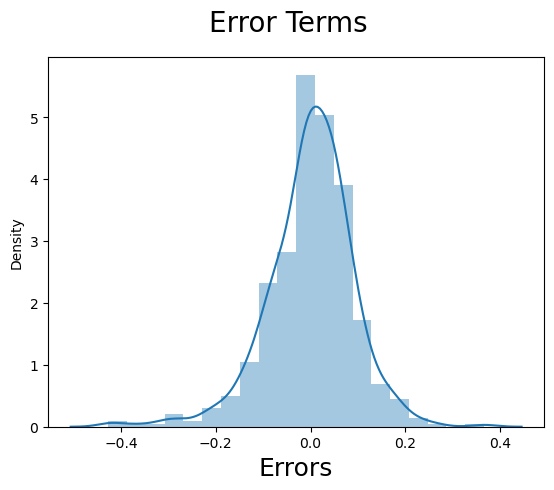

In [704]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are approximately following a normal distribution

Let us now check for Multi Collinearity

In [705]:
calculateVIF(X_train_6 )

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
8,spring,1.64
7,Misty,1.52
9,winter,1.40
3,july,1.35
4,sep,1.20
5,sun,1.17
6,Light_rainsnow,1.08


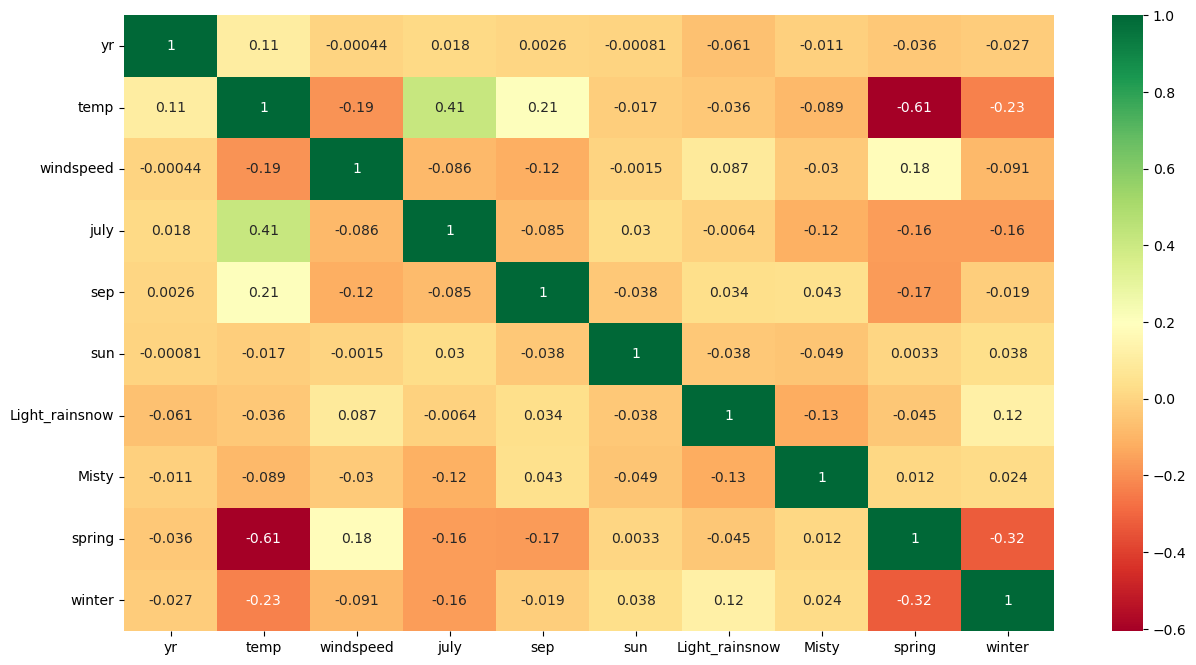

In [706]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_6.corr(),annot = True, cmap="RdYlGn")
plt.show()

All VIF values < 5 which is acceptable and also there is no multicolinearity as seen from the heatmap above.

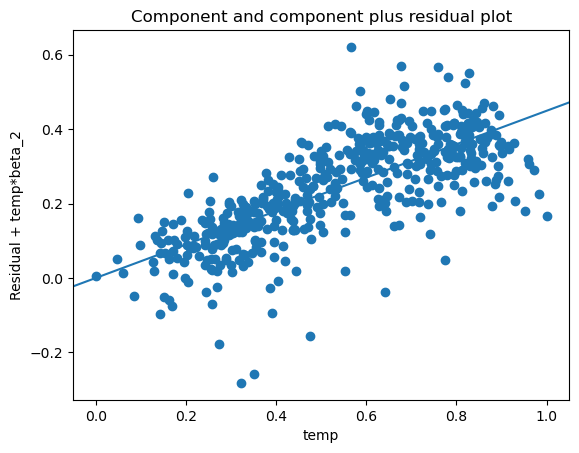

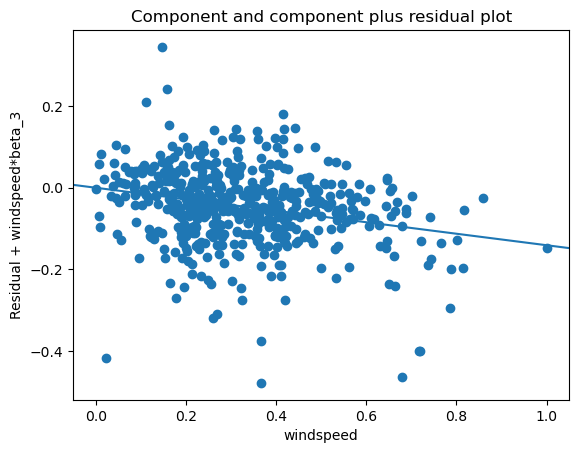

In [707]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()



sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Above visualizations show linearity

Let's also check for Homoscedasticity

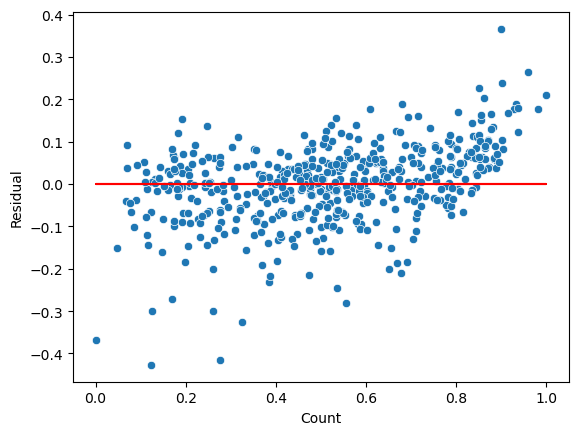

In [708]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As such, there is no visible pattern which can be observed from above plot for residuals.

# Checking for indpendence of residuals

Durbin-Watson value of final model lr_6 is 1.985, which signifies reasonably that there is no autocorrelation

# 7 Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model i.e. lr_4

In [709]:
# Applying scaling on the test dataset

num_vars2 = ['temp', 'atemp', 'hum', 'windspeed','cnt']
byke_newdata_test[num_vars2] = scaler.transform(byke_newdata_test[num_vars2])
byke_newdata_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_rainsnow,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [710]:
byke_newdata_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_rainsnow,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [711]:
y_test = byke_newdata_test.pop('cnt')
X_test = byke_newdata_test

In [713]:
col1 = X_train_6.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [714]:
y_pred = lr_6.predict(X_test_lm_6)

In [715]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8092

# 8 Model evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

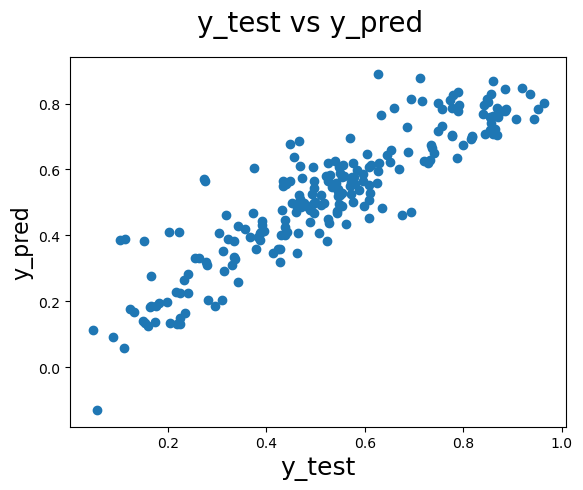

In [716]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [717]:
round(lr_6.params,4)

const             0.2586
yr                0.2346
temp              0.4493
windspeed        -0.1410
july             -0.0698
sep               0.0522
sun              -0.0443
Light_rainsnow   -0.2859
Misty            -0.0797
spring           -0.1147
winter            0.0438
dtype: float64

In [718]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8001


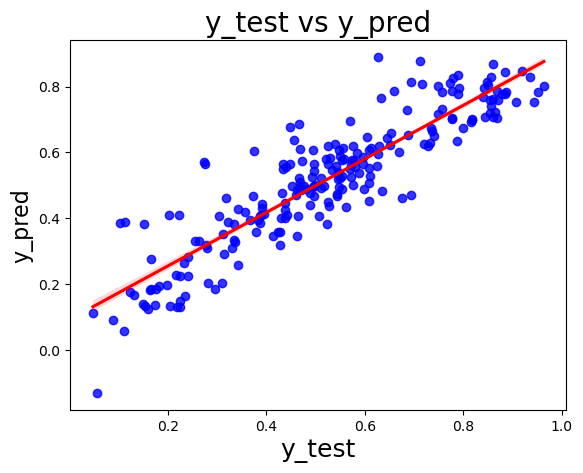

In [719]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.832
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.8092    
    - Test dataset Adjusted R^2  : 0.8001
    
 # It is a good fit

#### Demand of bikes depend on year, temp, windspeed,jul,  sep, sun,  Light_rainsnow, Misty, spring, winter
